# Pymaceuticals Inc.
---

### Analysis

- According to the data it is visible that Capomulin and Ramicane are least effective when the weight of the mouse is higher, yet they are effective when reducing tumors
- In conclusion for Drug Regimen, the higher the weight of the mouse the less effective the drug
 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice.
mice_count = mouse_df["Mouse ID"].nunique()
mice_count

249

In [14]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_df[mouse_df.duplicated(subset=["Mouse ID", "Timepoint"])]

In [15]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = mouse_df.loc[mouse_df["Mouse ID"]=="g989",:]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_df[mouse_df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice in the clean DataFrame
clean_df["Mouse ID"].unique().size


248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_df.groupby(clean_df["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mouse_mean = drug_regimen["Tumor Volume (mm3)"].mean()
mouse_median = drug_regimen["Tumor Volume (mm3)"].median()
mouse_var = drug_regimen["Tumor Volume (mm3)"].var()
mouse_std = drug_regimen["Tumor Volume (mm3)"].std()
mouse_sem = drug_regimen["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
sum_stats = pd.DataFrame({"Mean Tumor Volume": mouse_mean,
                          "Mediam Tumor Volume": mouse_median,
                          "Tumor Volume Variance": mouse_var,
                          "Tumor Volume Std. Dev.": mouse_std,
                          "Tumor Volume Sem": mouse_sem
                         })
sum_stats

,Mean Tumor Volume,Mediam Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stat_sum = clean_df[["Tumor Volume (mm3)", "Drug Regimen"]].groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"]).style.set_caption("Summary Statistics")
stat_sum

## Bar and Pie Charts

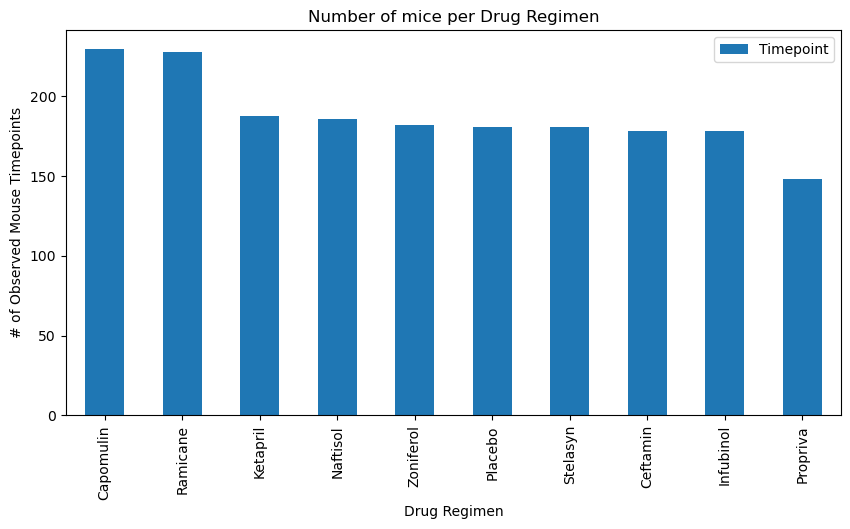

FileNotFoundError: [Errno 2] No such file or directory: '/Images/.png'

<Figure size 640x480 with 0 Axes>

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_timepoints = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
total_timepoints.sort_values(ascending=False).plot.bar(figsize=(10,5), title="Number of mice per Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.legend(loc="best")
plt.show()

plt.savefig("/Images/")

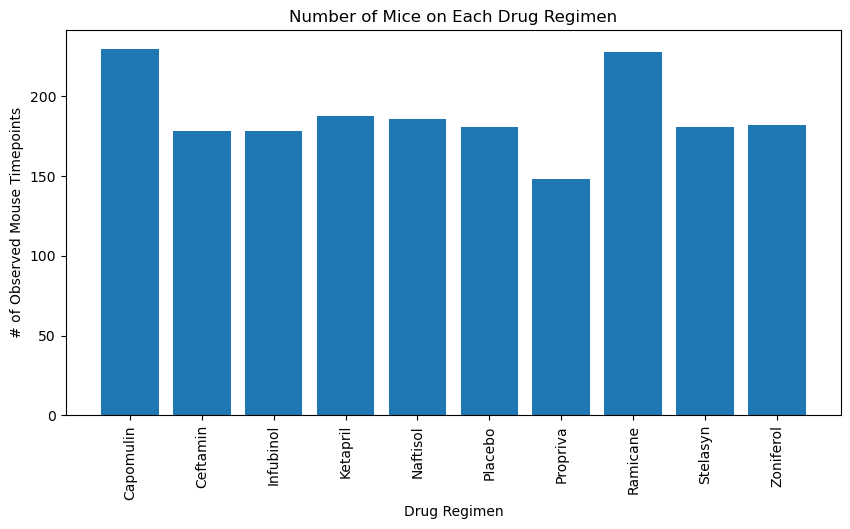

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_points = total_timepoints.sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(total_timepoints.index, total_timepoints.values)
plt.title("Number of Mice on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()


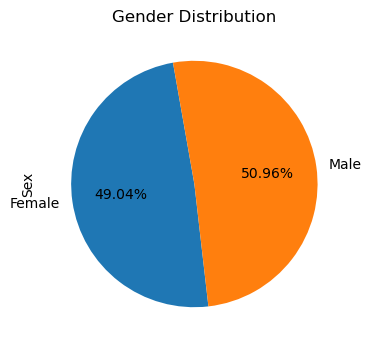

In [22]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender = clean_df.groupby(["Sex"])["Sex"].count()

# Get the unique mice with their gender
gender.unique()

# Make the pie chart
gender_plot = gender.plot.pie(startangle=100, y = "Mouse ID", title="Gender Distribution", autopct="%1.2f%%", figsize=(4,4))
plt.show()


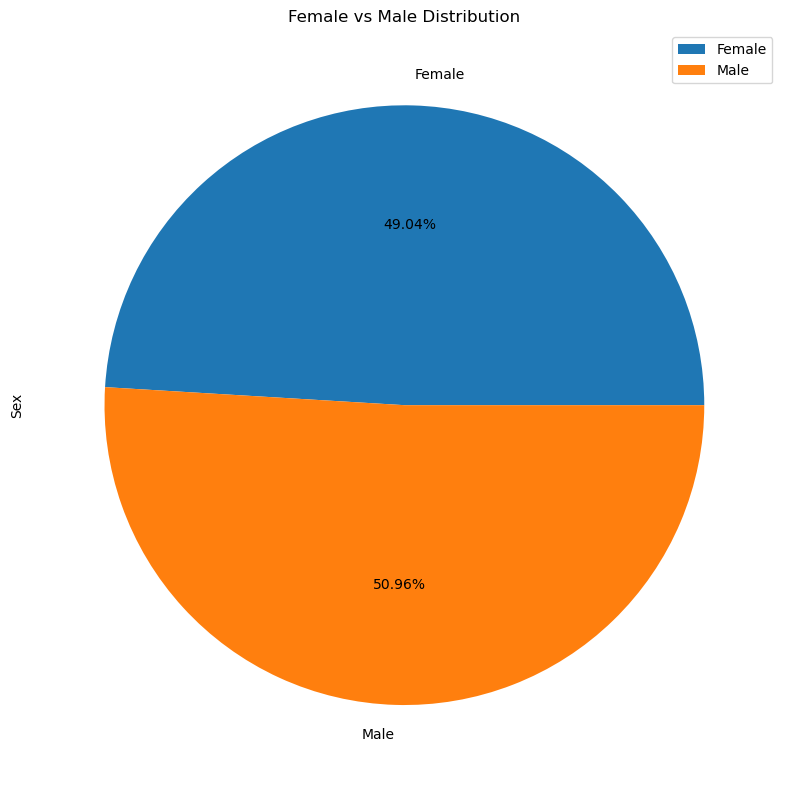

In [23]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study


# Make the pie chart
plt.figure(figsize=(8,8))
plt.pie(gender, labels=("Female", "Male"), autopct="%1.2f%%")
plt.title("Female vs Male Distribution")
plt.ylabel("Sex")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_time = clean_df.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
greatest_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_time_df = pd.DataFrame(greatest_time)
greatest_time_df = pd.merge(clean_df, greatest_time_df, on=("Drug Regimen", "Mouse ID", "Timepoint"), how="left")
greatest_time_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_tumor = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment:
    volume_data = greatest_time_df.loc[greatest_time_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    vol_tumor.append(volume_data)
    # add subset

                             
    # Determine outliers using upper and lower bounds
    quartiles = volume_data.quantile([0.25,0.5,0.75])
    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

    outliers = volume_data.loc[(volume_data > upper_bound) | (volume_data < lower_bound)]
    print(f"Outlier:{(outliers)}")

Outlier:18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Outlier:9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Outlier:Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier:Series([], Name: Tumor Volume (mm3), dtype: float64)


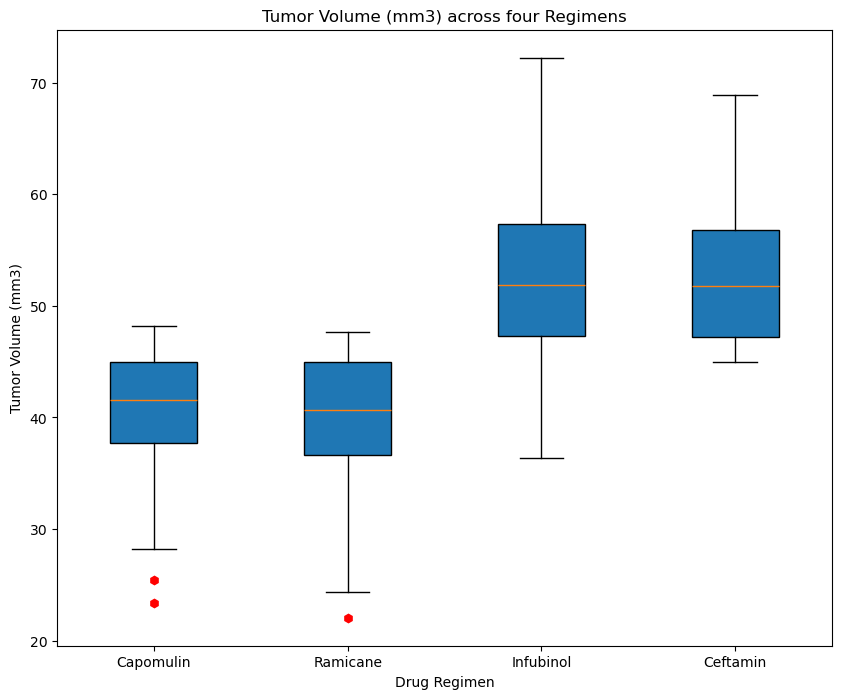

In [26]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_dist = dict(markerfacecolor='r', marker="h", markeredgecolor='r')
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.boxplot(vol_tumor,flierprops=tumor_dist, patch_artist=True)
ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(treatment) +1), ticklabels=treatment)
plt.show()


## Line and Scatter Plots

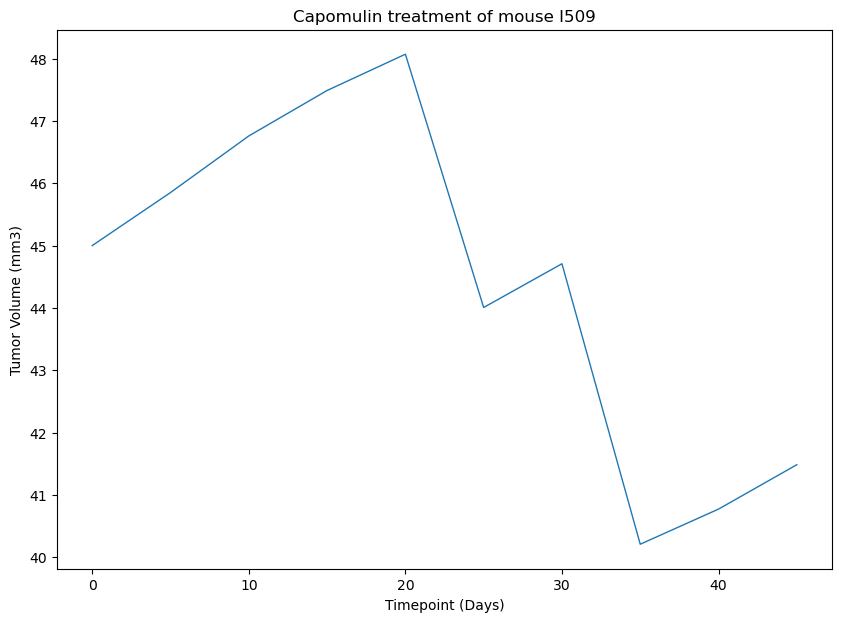

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
line_df

time = line_df["Timepoint"]
volume = line_df["Tumor Volume (mm3)"]

plt.figure(figsize=(10,7))
line, = plt.plot(time, volume, linewidth=1, markersize=10)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I509")
                 
plt.show()                

Unique values in 'Weight (g)': [16. 17. 15. 19. 18. 20. 21. 22. 23. 25. 24. 29. 28. 30. 27. 26.]
Unique values in 'Tumor Volume (mm3)': [45.         38.82589807 35.01427146 ... 69.17624607 70.31490411
 73.86784476]


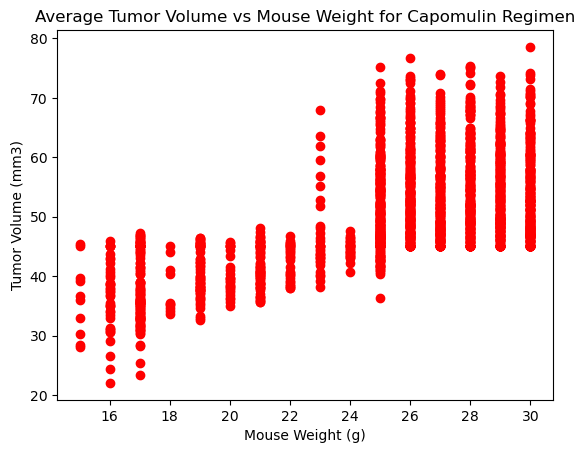

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the "Capomulin" drug regimen
print("Unique values in 'Weight (g)':", clean_df["Weight (g)"].unique())
print("Unique values in 'Tumor Volume (mm3)':", clean_df["Tumor Volume (mm3)"].unique())

clean_df["Weight (g)"] = pd.to_numeric(clean_df["Weight (g)"], errors='coerce')
clean_df["Tumor Volume (mm3)"] = pd.to_numeric(clean_df["Tumor Volume (mm3)"], errors='coerce')

average_weight = clean_df["Weight (g)"]
average_volume = clean_df["Tumor Volume (mm3)"]

plt.scatter(average_weight, average_volume, marker="o", facecolors="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin Regimen")
plt.show()

## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(average_volume["Weight (g)"], average_volume["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse and weight and average tumor volume is: {correlation}")

fig1, ax1 = plt.subplots(figsize=(12,8))
plt.scatter(average_volume["Weight (g)"], average_volume["Tumor Volume (mm3)"], s=90, color="blue")
plt.title("Correlation between mouse weight and Average tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

KeyError: 'Weight (g)'